<a href="https://www.kaggle.com/code/alihassanshahid/car-price-prediction?scriptVersionId=198615929" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="background-color:#3a8eae; border: 2px solid #007acc; border-radius:10px; padding:20px;">
    <h2 style="color:#ffffff; font-family: Arial, sans-serif;">🚗 Car Price Prediction</h2>
    <p style="color:#e0e0e0; font-size:16px;">
        This notebook aims to predict the prices of used cars based on various features like mileage, engine size, brand, and year. 
        We will use machine learning models like <strong style="color:#ff6f61;">Linear Regression</strong>, <strong style="color:#6fa3ef;">Decision Trees</strong>, 
        and <strong style="color:#6fe69e;">Gradient Boosting</strong> to achieve this.
    </p>
    <ul style="color:#ffffff; font-size:15px; list-style-type: disc; margin-left: 20px;">
        <li style="color:#ff6f61;">🔍 Data Cleaning & Preprocessing</li>
        <li style="color:#6fa3ef;">📊 Model Training & Evaluation</li>
        <li style="color:#6fe69e;">📈 Model Comparison</li>
    </ul>
</div>



| Model | Model | Model |
|-------|-------|-------|
| 🏎️ **RandomForest** | 🏎️ **AdaBoost** | 🏎️ **GradientBoosting** |
| 🏎️ **KNeighbors** | 🏎️ **SVR** | 🏎️ **DecisionTree** |
| 🏎️ **XGBoost** | 🏎️ **CatBoost** | 🏎️ **LGBM** |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv")


In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

<div style="background-color:#3a8eae; border: 2px solid #007acc; border-radius:10px; padding:20px;">
    <h2 style="color:#ffffff; font-family: Arial, sans-serif;">📊 Visualizations</h2>
    <p style="color:#e0e0e0; font-size:16px;">
        This section presents various visualizations to help analyze the used car prices. 
        The following charts will be utilized: <strong style="color:#ff6f61;">Histograms</strong>, 
        <strong style="color:#6fa3ef;">Box Plots</strong>, and <strong style="color:#6fe69e;">Scatter Plots</strong>.
    </p>
    <ul style="color:#ffffff; font-size:15px; list-style-type: disc; margin-left: 20px;">
        <li style="color:#ff6f61;">📊 Price Distribution</li>
        <li style="color:#6fa3ef;">📈 Price vs. Mileage</li>
        <li style="color:#6fe69e;">📉 Price vs. Year</li>
    </ul>
</div>


In [25]:
import plotly.graph_objects as go
labels = ['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'Hatchback', 'Jeep']
source = [0, 1, 2, 3, 4, 4, 0]  # Manufacturer to category
target = [4, 4, 5, 4, 5, 5, 5]
value = [1, 1, 1, 1, 1, 1, 1]

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=labels,
        color='blue'
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    ))])

fig.update_layout(title_text="Sankey Diagram of Manufacturer to Category Relationships", font_size=10)
fig.show()


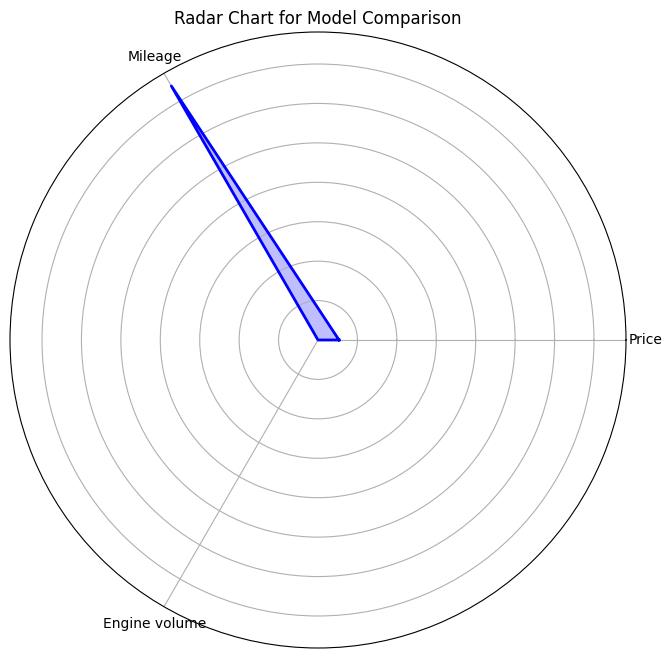

In [26]:
import numpy as np

# Sample data with averages for each model
labels = np.array(['Price', 'Mileage', 'Engine volume'])
values = np.array([13328, 186005, 3.5])
num_vars = len(labels)

# Create a radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values = np.concatenate((values,[values[0]]))
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Radar Chart for Model Comparison')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



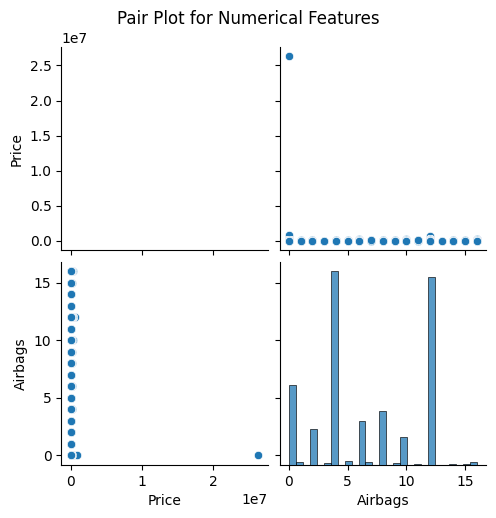

In [17]:
# Include only numerical columns for pair plot
numerical_df = df[['Price', 'Mileage', 'Engine volume', 'Airbags']]

sns.pairplot(numerical_df)
plt.suptitle('Pair Plot for Numerical Features', y=1.02)
plt.show()


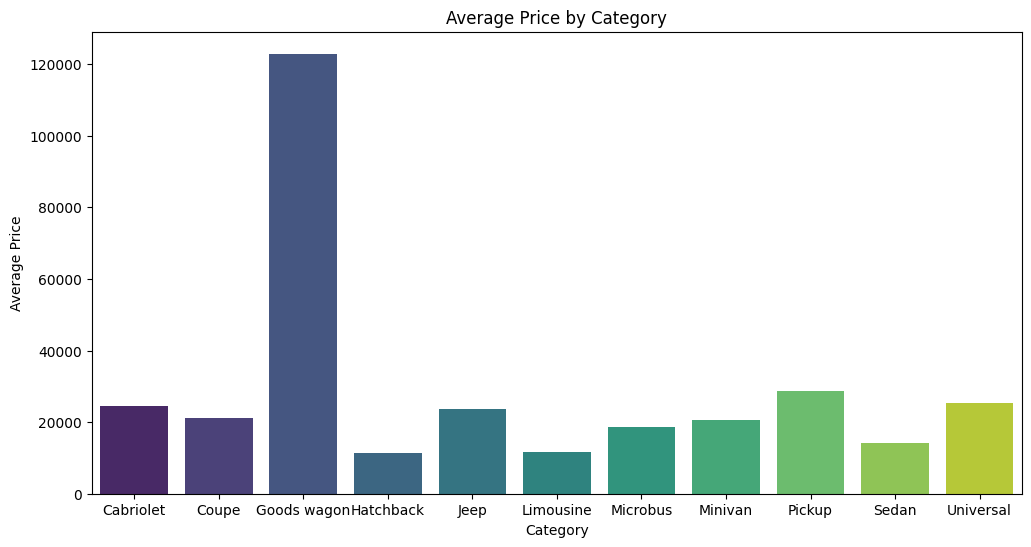

In [27]:
avg_price = df.groupby('Category')['Price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price, x='Category', y='Price', palette='viridis')
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.show()


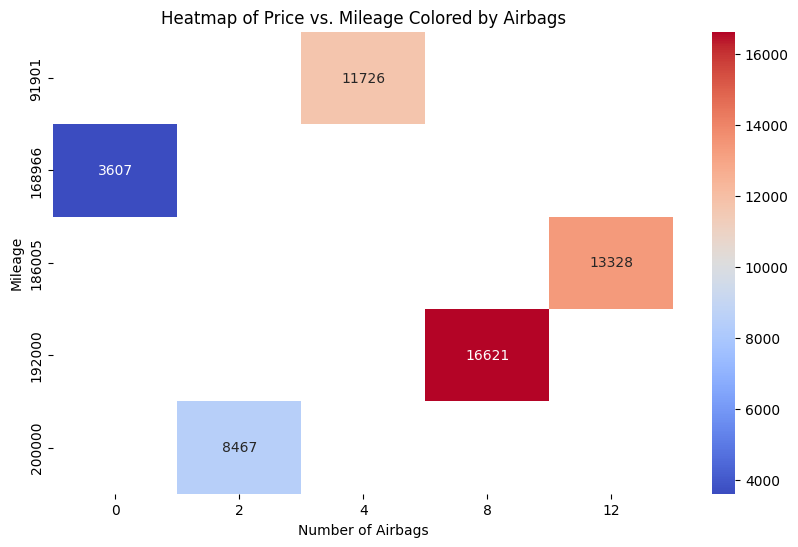

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'Price': [13328, 16621, 8467, 3607, 11726],
    'Mileage': [186005, 192000, 200000, 168966, 91901],
    'Airbags': [12, 8, 2, 0, 4]
}

df = pd.DataFrame(data)

# Create a heatmap
plt.figure(figsize=(10, 6))
heatmap_data = df.pivot_table(values='Price', index='Mileage', columns='Airbags', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f")
plt.title('Heatmap of Price vs. Mileage Colored by Airbags')
plt.xlabel('Number of Airbags')
plt.ylabel('Mileage')
plt.show()


In [29]:
import plotly.express as px

# Sample data with additional columns
data = {
    'Manufacturer': ['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HONDA'],
    'Drive wheels': ['4x4', '4x4', 'Front', '4x4', 'Front'],
    'Count': [1, 1, 2, 1, 1]
}

df = pd.DataFrame(data)

# Create a chord diagram
fig = px.sunburst(df, path=['Manufacturer', 'Drive wheels'], values='Count', title='Chord Diagram for Drive Wheels vs. Manufacturer')
fig.show()


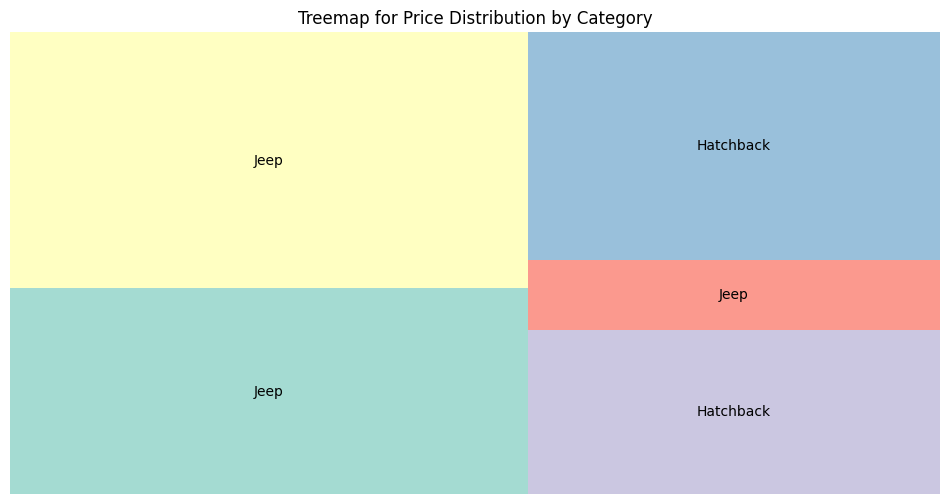

In [30]:
import squarify

# Sample data with additional columns
data = {
    'Category': ['Jeep', 'Jeep', 'Hatchback', 'Jeep', 'Hatchback'],
    'Price': [13328, 16621, 8467, 3607, 11726]
}

df = pd.DataFrame(data)

# Create a treemap
plt.figure(figsize=(12, 6))
squarify.plot(sizes=df['Price'], label=df['Category'], alpha=0.8, color=sns.color_palette('Set3', len(df)))
plt.title('Treemap for Price Distribution by Category')
plt.axis('off')
plt.show()


In [39]:
""" df_sampled = df.sample(n=1000, random_state=42)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', data=df_sampled, color='#ff4d4d')
plt.title('Price vs. Mileage', fontsize=16)
plt.xlabel('Mileage', fontsize=14)
plt.ylabel('Price', fontsize=14)
# plt.grid(True)
plt.show() """


" df_sampled = df.sample(n=1000, random_state=42)\n\nplt.figure(figsize=(10, 6))\nsns.scatterplot(x='Mileage', y='Price', data=df_sampled, color='#ff4d4d')\nplt.title('Price vs. Mileage', fontsize=16)\nplt.xlabel('Mileage', fontsize=14)\nplt.ylabel('Price', fontsize=14)\n# plt.grid(True)\nplt.show() "

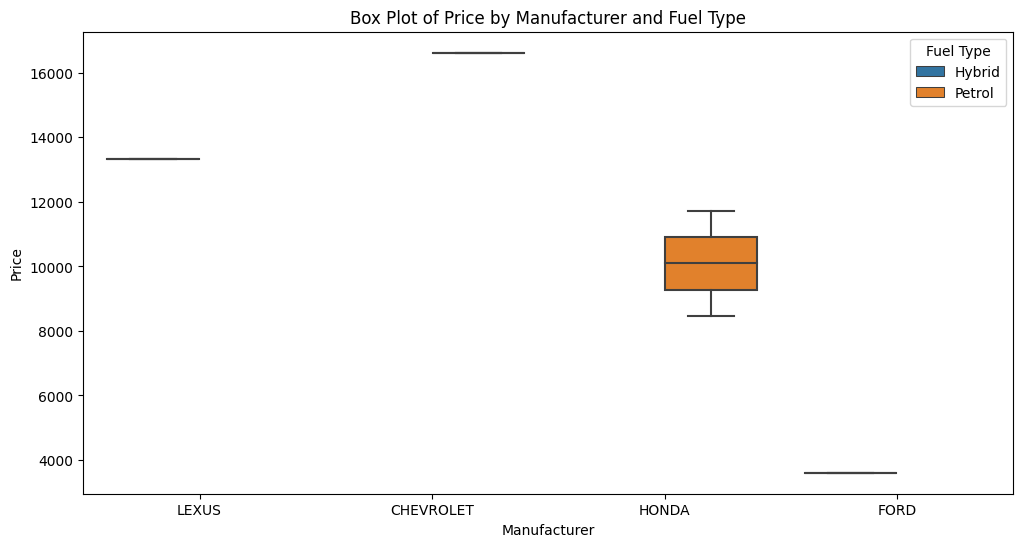

In [32]:
# Sample data with additional columns
data = {
    'Price': [13328, 16621, 8467, 3607, 11726],
    'Manufacturer': ['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HONDA'],
    'Fuel type': ['Hybrid', 'Petrol', 'Petrol', 'Hybrid', 'Petrol']
}

df = pd.DataFrame(data)

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Manufacturer', y='Price', hue='Fuel type')
plt.title('Box Plot of Price by Manufacturer and Fuel Type')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.legend(title='Fuel Type')
plt.show()


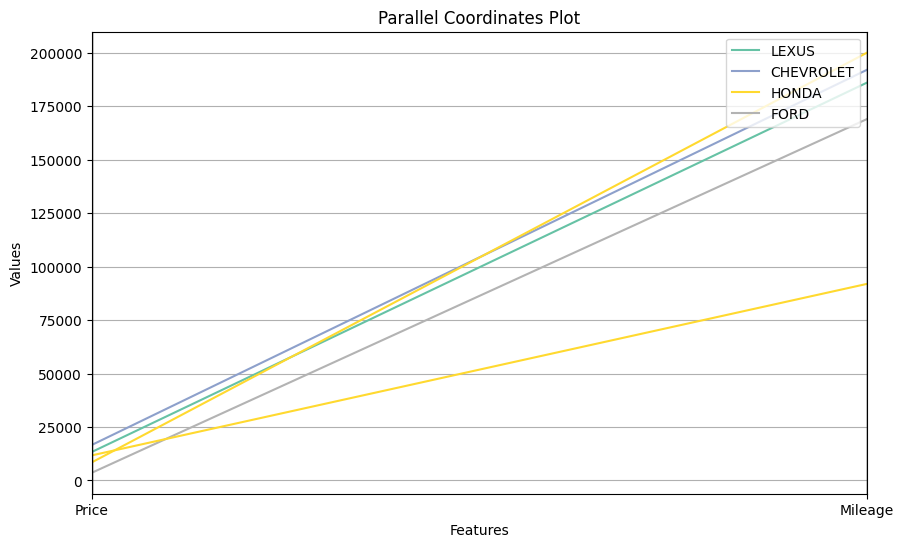

In [33]:
from pandas.plotting import parallel_coordinates

# Sample data with additional columns
data = {
    'Price': [13328, 16621, 8467, 3607, 11726],
    'Mileage': [186005, 192000, 200000, 168966, 91901],
    'Manufacturer': ['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HONDA']
}

df = pd.DataFrame(data)

# Create a parallel coordinates plot
plt.figure(figsize=(10, 6))
parallel_coordinates(df, 'Manufacturer', colormap='Set2')
plt.title('Parallel Coordinates Plot')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


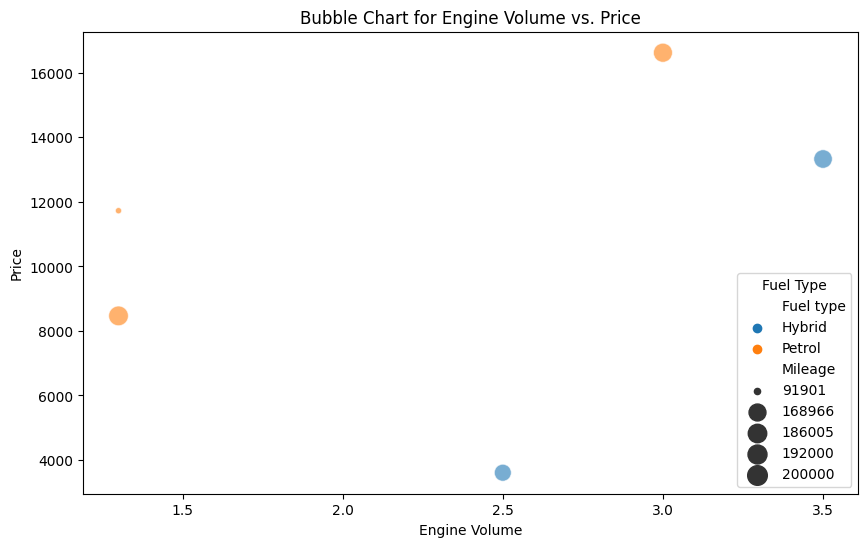

In [34]:
# Sample data with additional columns
data = {
    'Price': [13328, 16621, 8467, 3607, 11726],
    'Engine volume': [3.5, 3.0, 1.3, 2.5, 1.3],
    'Mileage': [186005, 192000, 200000, 168966, 91901],
    'Fuel type': ['Hybrid', 'Petrol', 'Petrol', 'Hybrid', 'Petrol']
}

df = pd.DataFrame(data)

# Create a bubble chart
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Engine volume', y='Price', size='Mileage', sizes=(20, 200), hue='Fuel type', alpha=0.6)
plt.title('Bubble Chart for Engine Volume vs. Price')
plt.xlabel('Engine Volume')
plt.ylabel('Price')
plt.legend(title='Fuel Type')
plt.show()


In [38]:
""" df_sampled = df.sample(n=1000, random_state=42)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Prod. year', y='Price', data=df_sampled, palette='bright')
plt.title('Price vs. Production Year', fontsize=16)
plt.xlabel('Production Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show() """


" df_sampled = df.sample(n=1000, random_state=42)\n\nplt.figure(figsize=(10, 6))\nsns.boxplot(x='Prod. year', y='Price', data=df_sampled, palette='bright')\nplt.title('Price vs. Production Year', fontsize=16)\nplt.xlabel('Production Year', fontsize=14)\nplt.ylabel('Price', fontsize=14)\nplt.xticks(rotation=45)\nplt.grid(True)\nplt.show() "

In [37]:
""" df_sampled = df.sample(n=1000, random_state=42)

sns.set_palette(["#f7e227", "#000000", "#ff4d4d"])

plt.figure(figsize=(10, 6))
sns.histplot(df_sampled['Price'], kde=True, color='black')
plt.title('Distribution of Car Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show() """


' df_sampled = df.sample(n=1000, random_state=42)\n\nsns.set_palette(["#f7e227", "#000000", "#ff4d4d"])\n\nplt.figure(figsize=(10, 6))\nsns.histplot(df_sampled[\'Price\'], kde=True, color=\'black\')\nplt.title(\'Distribution of Car Prices\', fontsize=16)\nplt.xlabel(\'Price\', fontsize=14)\nplt.ylabel(\'Frequency\', fontsize=14)\nplt.grid(True)\nplt.show() '

<div style="background-color:#3a8eae; border: 2px solid #007acc; border-radius:10px; padding:20px;">
    <h2 style="color:#ffffff; font-family: Arial, sans-serif;">🔧 Data Cleaning</h2>
    <p style="color:#e0e0e0; font-size:16px;">
        This section outlines the steps taken to clean the dataset for used car price prediction.
        We will handle data type conversions, outlier removal, and missing values.
    </p>
</div>


In [ ]:
import pandas as pd

# Convert 'Mileage' column from string to numeric after removing ' km'
df['Mileage'] = pd.to_numeric(df['Mileage'].str.replace(' km', ''))

# Convert 'Engine volume' to numeric, accounting for potential non-numeric values
df['Engine volume'] = pd.to_numeric(df['Engine volume'], errors='coerce')

# Ensure 'Price' is numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the dataframe by removing rows with values outside the IQR range
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of numeric columns to apply outlier removal
numeric_columns = ['Price', 'Mileage', 'Engine volume']

# Apply outlier removal to each numeric column
for column in numeric_columns:
    df = remove_outliers(df, column)

# Display the cleaned dataset without outliers
print(df.describe())


In [ ]:
df.isnull().sum()

<div style="background-color:#3a8eae; border: 2px solid #007acc; border-radius:10px; padding:20px;">
    <h2 style="color:#ffffff; font-family: Arial, sans-serif;">🛠️ Models</h2>
    <p style="color:#e0e0e0; font-size:16px;">
        In this section, we will explore the various machine learning models used to predict car prices. 
        Each model offers unique strengths and will be evaluated for performance.
    </p>

</div>


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Identifying categorical and numerical columns
categorical_columns = df.select_dtypes('object').columns
numerical_columns = df.select_dtypes(exclude='object').drop('Price', axis=1).columns

# Define preprocessing for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
    ]
)

# Define different models
models = {
    # 'LinearRegression': LinearRegression(),
    # 'Ridge': Ridge(alpha=1.0),
    # 'Lasso': Lasso(alpha=0.1),
    'RandomForest': RandomForestRegressor(n_estimators=500, random_state=50),
    # 'AdaBoost': AdaBoostRegressor(n_estimators=500, random_state=50),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, random_state=50),
    'KNeighbors': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='rbf', C=1000, gamma=0.1, epsilon=.1),
    'DecisionTree': DecisionTreeRegressor(random_state=50),
    'XGBoost': XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6, random_state=50),
    'CatBoost': CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, loss_function='RMSE', random_seed=50, verbose=False),
    'LGBM': LGBMRegressor(n_estimators=1000, learning_rate=0.05, random_state=50)
}

# Splitting the data into training and testing sets
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train and evaluate each model
for name, model in models.items():
    # Define the pipeline for each model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluation metrics
    # print(f"\nModel: {name}")
    # print('R2 score:', r2_score(y_test, y_pred))
    # print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    # print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

    # Plotting actual vs predicted prices for each model
    # plt.figure(figsize=(10, 6))
    # sns.scatterplot(x=y_test, y=y_pred, color='#f7e227')
    # plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    # plt.title(f'Predicted vs. Actual Prices for {name}', fontsize=16)
    # plt.xlabel('Actual Price', fontsize=14)
    # plt.ylabel('Predicted Price', fontsize=14)
    # plt.grid(True)
    # plt.show()



/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [0, 1, 2, 6, 7] during transform. These unknown categories will be encoded as all zeros

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [0, 1, 2, 6, 7] during transform. These unknown categories will be encoded as all zeros

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [0, 1, 2, 6, 7] during transform. These unknown categories will be encoded as all zeros

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [0, 1, 2, 6, 7] during transform. These unknown categories will be encoded as all zeros

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in co

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1213
[LightGBM] [Info] Number of data points in the train set: 15389, number of used features: 446
[LightGBM] [Info] Start training from score 18858.786276


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [0, 1, 2, 6, 7] during transform. These unknown categories will be encoded as all zeros



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1213
[LightGBM] [Info] Number of data points in the train set: 15389, number of used features: 446
[LightGBM] [Info] Start training from score 18858.786276

Model Performance Comparison:
              Model   R2 Score  Mean Absolute Error  Mean Squared Error  \
0      RandomForest -72.265245          6962.178708        2.810033e+10   
1  GradientBoosting -92.455997         10676.213393        3.584434e+10   
2        KNeighbors -18.190527          7039.652339        7.360382e+09   
3               SVR   0.365099          6927.046006        2.435114e+08   
4      DecisionTree   0.525407          5059.949324        1.820265e+08   
5           XGBoost   0.636076          5825.585707        1.395804e+08   
6          CatBoost -59.933070          8914.262836        2.337042e+10   
7              LGBM -2

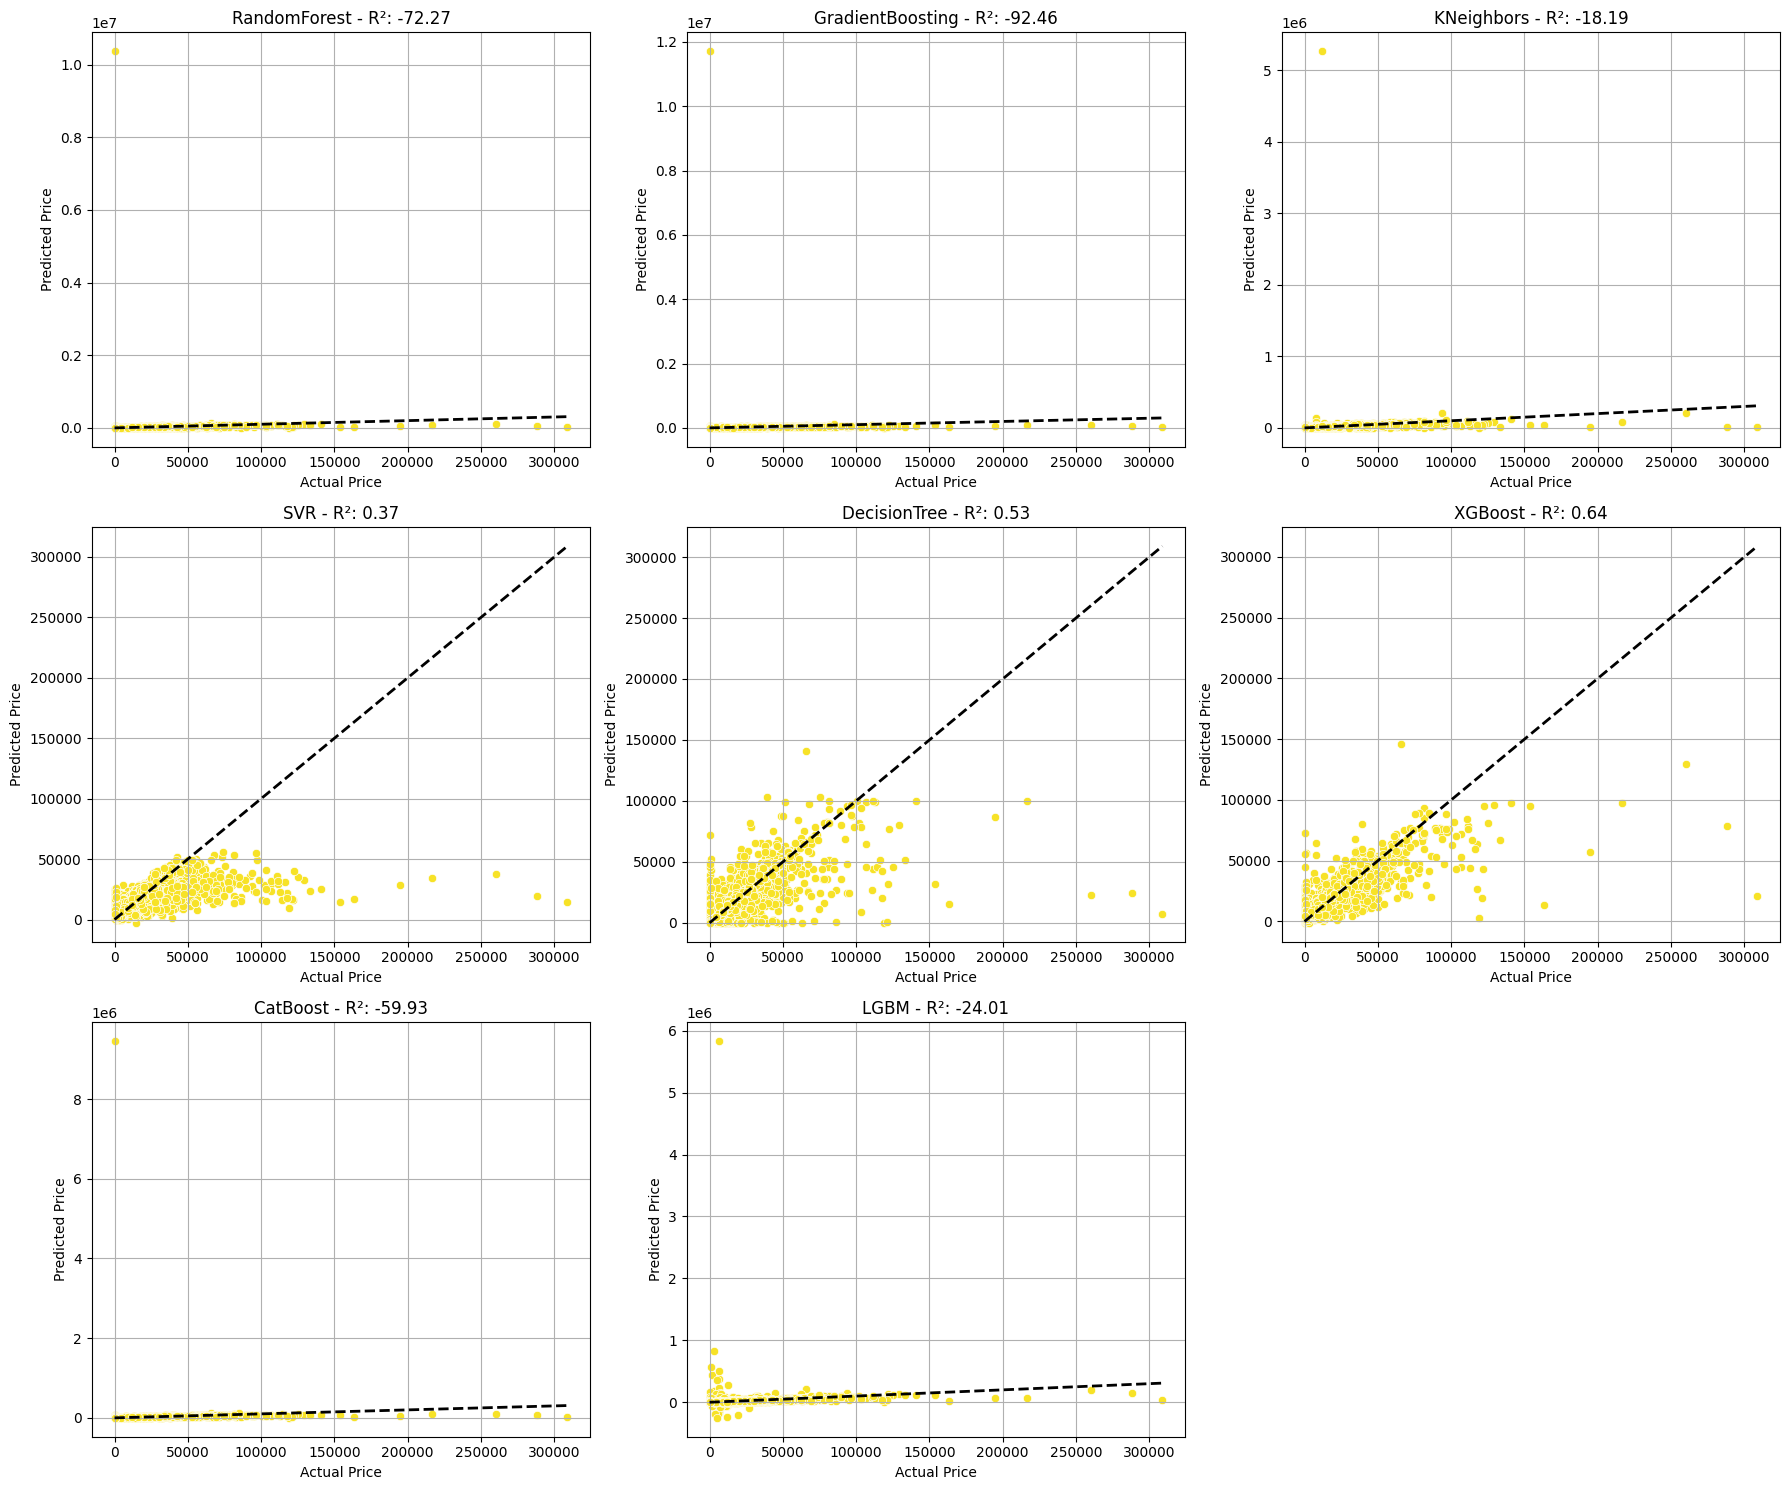

In [24]:
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Store model results
model_performance = []

# Train and evaluate each model
for name, model in models.items():
    # Define the pipeline for each model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Save results
    model_performance.append({
        'Model': name,
        'R2 Score': r2,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Predictions': y_pred  # Save predictions for later visualization
    })

# Convert results to DataFrame for easy comparison
performance_df = pd.DataFrame(model_performance)

# Display performance of all models
print("\nModel Performance Comparison:")
print(performance_df)

# Create a combined plot of actual vs predicted prices for all models
num_models = len(model_performance)
ncols = 3  # Number of columns in the subplot
nrows = (num_models + ncols - 1) // ncols  # Calculate number of rows needed

plt.figure(figsize=(18, nrows * 5))  # Adjust figure size for better readability

for idx, model_info in enumerate(model_performance):
    plt.subplot(nrows, ncols, idx + 1)
    sns.scatterplot(x=y_test, y=model_info['Predictions'], color='#f7e227')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title(f"{model_info['Model']} - R²: {model_info['R2 Score']:.2f}", fontsize=12)
    plt.xlabel('Actual Price', fontsize=10)
    plt.ylabel('Predicted Price', fontsize=10)
    plt.grid(True)

plt.tight_layout()
plt.show()
